<a href="https://colab.research.google.com/github/Juanchp00/Teor-a-de-se-ales/blob/main/Detecci%C3%B3n_1_y_%20-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy.solvers import solve_linear_system
from sympy import Symbol
import numpy as np
import sympy as sp
import seaborn as sns
from sympy.solvers import solve
from sympy.matrices import Matrix
from matplotlib import pyplot as plt
from scipy.signal import square, sawtooth
from matplotlib import pyplot as plt
from scipy.signal import lti
from scipy.signal import butter
from scipy.signal import filtfilt, find_peaks
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import hilbert
from scipy.integrate import cumtrapz
from scipy import signal
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 6)
matplotlib.rcParams['figure.dpi'] = 90
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact 
from sympy.solvers import solve_linear_system 
from sympy import Symbol 
import sympy as sym 
from sympy.matrices import Matrix #Trabajo con matrices
from scipy.signal import lti, convolve, correlate, hilbert, butter, filtfilt
import plotly.graph_objects as go
from scipy.fftpack import fft, fftfreq, fftshift, ifft
import random

In [3]:
def fft_plot(t, y, wmin=None, wmax=None):
    """
    Esta función recibe una señal (con su vector de tiempo) y gráfica 
    su representación en el tiempo y en la frecuencia.
    
    t:  vector de tiempo
    y: señal
    wmin: frecuencia mínima en la gráfica
    wmax: frecuencia máxima en la gráfica
    
    """
    # La frequencia de muestreo la extraigo del vector del tiempo
    sample_rate = t[1] - t[0]
    
    Y = np.abs(fftshift(fft(y)))  # Valor absoluto de Fourier
    Y = Y / Y.shape[0]  # Normalización
    W = fftshift(fftfreq(Y.shape[0], sample_rate))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño y densidad de píxeles cómoda
    plt.figure(figsize=(16, 5), dpi=90)
    
    #  Primer plot
    plt.subplot(121)  # 1 fila, 2 columnas, espacio 1
    plt.plot(t, y, color='C0')
    plt.grid(True)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    
    plt.subplot(122)  # 1 fila, 2 columnas, espacio 2
    plt.plot(W, Y, color='C1')  # grafica el contorno
    plt.fill_between(W, Y, 0, color='C1', alpha=0.3)  # grafica el relleno con una transparencia
    if wmin and wmax:
        plt.xlim(wmin, wmax)
    plt.ylim(0)
    plt.grid(True)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

def amplitude_discretization(y, bit=2):
    """
    Discretiza una señal en amplitud según un número determinado de bits.
    
    y: señal
    bit: número de bits para usar en la discretización
    
    """
    # El nuevo «alfabeto» de la señal, una lista definida de valores que la señal puede tomar en amplitud
    # la creo rellenando el rango mínimo y máximo con un número finito valores equidistantes
    new_domain = np.linspace(y.min(), y.max(), 2**bit)
    #                                            ^
    # Estoy usando potencias de dos simplemente porque hay unos tipos de modulaciones digitales 
    # en los que se facilita el trabajar con estos tamaños, y porque estamos familiarizados con
    # los conversores análogo-digitales de N-bit
    
    # Aproximo los valores continuos a los mas cercanos de mi nuevo alfabeto.
    y_n = [new_domain[np.abs(new_domain - v).argmin()] for v in y]
    
    return np.array(y_n)  # retorna la señal discretizada

def lti_simulation(lti, t, x):
    """
    lti: lti system, lo que retorna scipy
    t: vector de tiempo
    x: señal de entrada

    """
    t_, output_, _ = lti.output(x, t)
    
    return t_, output_  # retorna el mismo vector de tiempo y y la señal resultante

def normalization(signal):
    """
    Normaliza la señal, dejándola únicamente positiva y variando de 0 a 1
    
    signal: señal
    """
    signal_ = signal.copy()
    signal_ -= signal_.min()  # Se desplaza para que únicamente sea positiva
    signal_ /= signal_.max()  # Se divide por el máximo, para que el dominio sea de 0 a 1
    
    return signal_

def normalization1(signal):
  """
  Normaliza la señal, dejándola únicamente positiva y variando de 0 a 1
   
  signal: señal
    """
  signal_ = signal.copy()
  signal_ = signal_ / signal_.max()  # Se divide por el máximo, para que el dominio sea de 0 a 1
  return signal_  

def pulse_train(t, pulses=10):
    """
    Define un tren de pulsos.
    
    t: vector de tiempo
    pulses: número de pulsos
    
    """
    width = (t.max()-t.min())/(pulses)
    
    return t, np.array(t%width*2<(width), dtype=np.int)


def error_cuadratico(signal1,signal2,n):
  error=0
  for i in range(n):
    error = error + (signal1[i] - signal2[i])**2
  error = error/n
  return error

def prob(A,b):
  return A[map_(b,-0.25,1.25,0,x1.size)]

def prob_conjunta (a,b):
  return prob(A1,a)*prob(B1,b)

def prob_condicional(a, b, cond):
  if cond == 'inputn':
    return prob_conjunta(a,b) / prob(A1,a)
  elif cond == 'output':
    return prob_conjunta(a,b) / prob(B1,b)

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_bandpass_filter(data, cutoff1, cutoff2, fs, order):
    nyq = 0.5 * fs
    normal_cutoff1 = cutoff1 / nyq
    normal_cutoff2 = cutoff2 / nyq
    # Get the filter coefficients 
    b, a = butter(order, [normal_cutoff1, normal_cutoff2], btype='bandpass', analog=False)
    y = filtfilt(b, a, data)
    return y


def c(k):

  return sum(y*np.exp(-1j*w*k*t))/t.size
  #np.trapz(y*np.exp(-1j*w*t)*t/(t[-1]-t[1]))

def f(k):

  return sum((c(k)*np.exp(1j*w*k*t)) for k in range(-k,k+1))

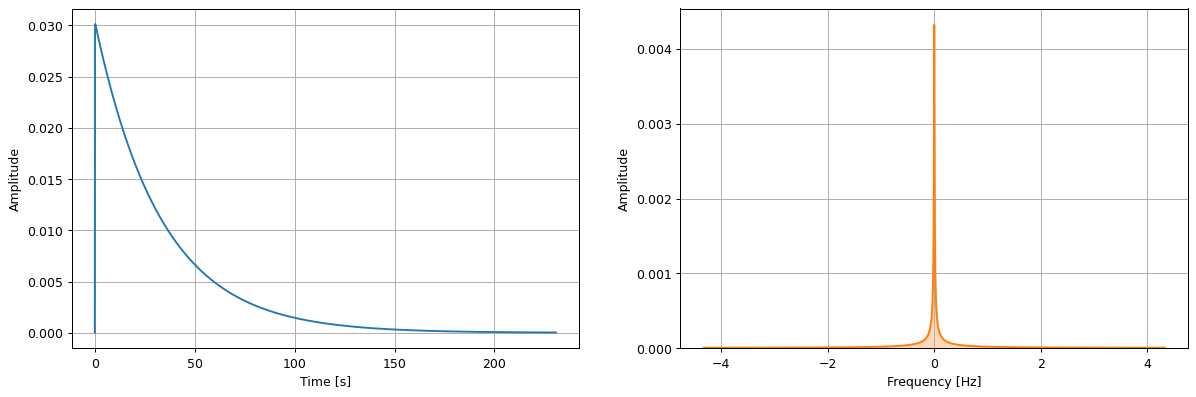

In [4]:
c1=0.00001
r1=100000
r2=3300000

#Encontramos respuesta al impulso
n1=c1*r1
n2=c1*r2
num = [n1,] # b1
den = [n1, n2,1] #a2,a1, a0
t = np.linspace(0, 10, 2000)
lti_system = lti(num, den)
t, h=lti_system.impulse(N=2000)
fft_plot(t,h)

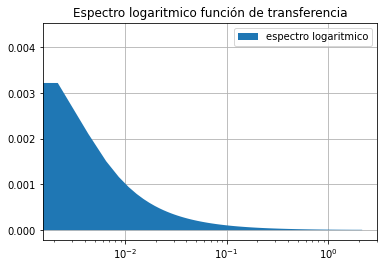

In [5]:
#Espectro en escala logaritmica
tc = np.linspace(-t[-1], t[-1], h.shape[0]) 
z = fftshift(np.abs(fft(h)))
z = z / z.shape[0]  
w = fftshift(fftfreq(h.shape[0], tc[1]-tc[0]))
plt.fill_between(w, z, 0,label="espectro logaritmico", zorder=2)
plt.legend()
plt.title('Espectro logaritmico función de transferencia')
plt.semilogx()
plt.grid(True)

##Secuencia sin pasar por sistema LTI

32

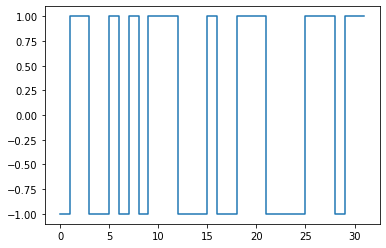

In [6]:
tamaño=32
"""
secuencia=np.zeros(tamaño)

#a=35500 #unos
#b=tamaño-a #menos unos

#secuencia=np.array([1]*a+[-1]*b)
#random.shuffle(secuencia)

dato1=0
dato2=0
datos=np.zeros(2)

for i in range (0,tamaño):
  secuencia[i]=random.randint(0,1)
  if (secuencia[i]==0):
    secuencia[i]=-1
    dato2=dato2+1

dato1=tamaño-dato2

datos[0]=dato1
datos[1]=dato2

#datos[0]=a
#datos[1]=b

mensaje=secuencia
"""

u1 = 1 
v1 = 0.1
u2 = -1

secuencia = np.random.choice([u1, u2], size=tamaño, p=[0.5, 0.5])
mensaje = secuencia
plt.step(range(tamaño), secuencia, '-')
len(secuencia)

(4096,)


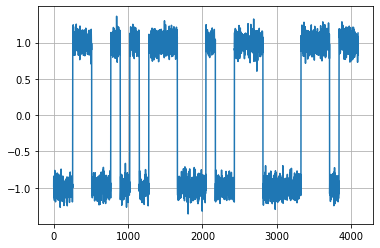

In [7]:
secuencia = np.concatenate([[v]*128 for v in secuencia])
secuencia = secuencia.astype('float')

secuenciap=secuencia.copy()

symbol1 = secuenciap[secuenciap==1]
noise1 = np.random.normal(0, 0.1, size=symbol1.size)
secuenciap[secuenciap==1] = symbol1 + noise1

symbol2 = secuenciap[secuenciap==-1]
noise2 = np.random.normal(0, 0.1, size=symbol2.size)
secuenciap[secuenciap==-1] = symbol2 + noise2

"""
plt.xlim(20,40)
plt.plot(range(tamaño),secuenciap, C='red', label='con ruido')
plt.step(range(tamaño),secuencia,'--', C='C', label='original')
plt.legend()
plt.grid()
"""

plt.plot(secuenciap)
plt.grid()
print(secuenciap.shape)

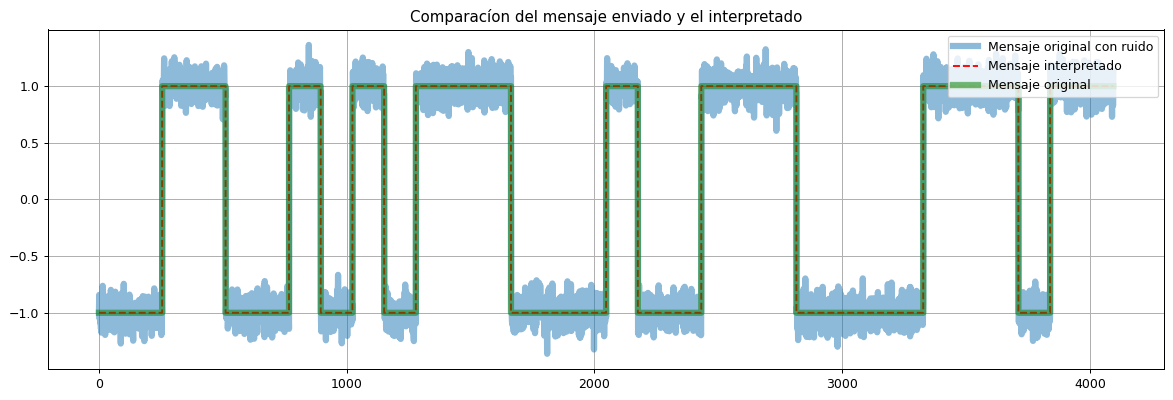

In [8]:
d_a=[]#señal interpretada vacía
for j in secuenciap.reshape(secuenciap.shape[0],-1):
    if np.sum((j-(mensaje.min()))**2) > np.sum((j-(mensaje.max()))**2):#comparación de grado de parecido con cada simbolo para la toma de decisión posterior
        d_a.append(mensaje.max())
    else:
        d_a.append(mensaje.min())

ms_orig=secuenciap[::1] 
plt.figure(figsize=(16,5),dpi=90)
plt.title('Comparacíon del mensaje enviado y el interpretado')
plt.plot(range(len(ms_orig)),ms_orig,linewidth=5,alpha=0.5,label='Mensaje original con ruido')
plt.step(range(len(d_a)),d_a,'--',color='red',label='Mensaje interpretado')
plt.step(range(tamaño*128),secuencia,linewidth=5,alpha=0.5, color='green', label='Mensaje original')
plt.legend(loc=1)
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



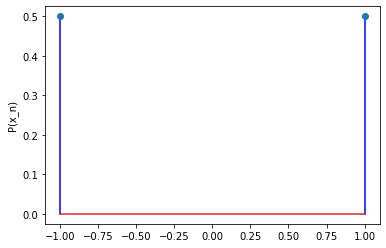

In [9]:
#Probabilidad marginal
proba=np.zeros(2)

numunos=secuencia[secuencia==secuencia.max()]

numceros=secuencia[secuencia==secuencia.min()]

proba[0]=len(numunos)/(tamaño*128)
proba[1]=len(numceros)/(tamaño*128)

x=np.array([1,-1])

plt.stem(x,proba,'b')
plt.ylabel('P(x_n)')
plt.show()

In [10]:
#cuantos 1 y -1 detectó 
prueba=np.zeros(tamaño*128)
for i in range (0, tamaño*128):
  prueba[i]=d_a[i]


unos=prueba[prueba==prueba.max()]
ceros=prueba[prueba==prueba.min()]

In [11]:
vector=np.zeros(tamaño*128)

for i in range (0, len(vector)):
  if (prueba[i]==secuencia[i]):
    vector[i]=1
  else:
    vector[i]=0

In [12]:
vectoru = vector[vector==1]
vectorc = vector[vector==0]

probe=len(vectorc)/len(vector)

In [13]:
from ipywidgets import interact,IntSlider

def pltbase(n=1):
  #secuencia = secuencia.astype('float')

  secuenciapp=secuencia.copy()
  symbol1p = secuenciapp[secuenciapp==1]
  noise1p = np.random.normal(0, n, size=symbol1p.size)
  secuenciapp[secuenciapp==1] = symbol1p + noise1p

  symbol2p = secuenciapp[secuenciapp==-1]
  noise2p = np.random.normal(0, n, size=symbol2.size)
  secuenciapp[secuenciapp==-1] = symbol2p + noise2p

  """
  plt.xlim(0,100)
  plt.plot(range(tamaño),secuenciapp, C='red', label='con ruido')
  plt.plot(range(tamaño),secuencia,'--', C='C', label='original')
  plt.legend()
  plt.grid()
  """

  d_ap=[]#señal interpretada vacía
  for j in secuenciapp.reshape(secuenciapp.shape[0],-1):
    if np.sum((j-(mensaje.min()))**2) > np.sum((j-(mensaje.max()))**2):#comparación de grado de parecido con cada simbolo para la toma de decisión posterior
      d_ap.append(mensaje.max())
    else:
      d_ap.append(mensaje.min())
  ######
  #cuantos 1 y -1 detectó 
  pruebap=np.zeros(tamaño*128)
  for i in range (0, tamaño*128):
    pruebap[i]=d_ap[i]


  for i in range (0, len(vector)):
    if (pruebap[i]==secuencia[i]):
     vector[i]=1
    else:
     vector[i]=0

  vectoru = vector[vector==1]
  vectorc = vector[vector==0]

  probe=len(vectorc)/len(vector)

  #######
  ms_origp=secuenciapp[::1] 
  plt.figure(figsize=(16,5),dpi=90)
  plt.subplot(211)
  plt.title('Comparacíon del mensaje enviado y el interpretado, Pe = %.1f %%' % (100*probe))
  plt.plot(range(len(ms_origp)),ms_origp,linewidth=5,alpha=0.5,label='Mensaje original con ruido')
  plt.step(range(len(d_ap)),d_ap,'--',color='red',label='Mensaje interpretado')
  plt.step(range(tamaño*128),secuencia,linewidth=5,alpha=0.5, color='green', label='Mensaje original')
  plt.legend(loc=1)
  plt.grid()

  ####

  #sns.distplot(secuenciapp, bins=100)

  gaussian1=[]
  gaussian2=[]

  for i in range (0,len(secuenciapp)):
    if (d_ap[i]==1):
      gaussian1.append(secuenciapp[i])    
    else:
      gaussian2.append(secuenciapp[i])

  plt.subplot(212)
  sns.distplot(gaussian1, bins=100)
  sns.distplot(gaussian2, bins=100)

  print(len(vector),len(vectoru), len(vectorc))
  return

interact(pltbase,n=(0.1,0.9,0.1))

interactive(children=(FloatSlider(value=0.9, description='n', max=0.9, min=0.1), Output()), _dom_classes=('wid…

<function __main__.pltbase>

## Pasando la secuencia por sistema LTI

32

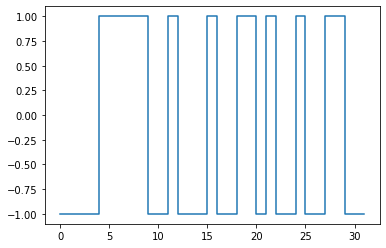

In [14]:
tamaño=32
"""
secuencia=np.zeros(tamaño)

#a=35500 #unos
#b=tamaño-a #menos unos

#secuencia=np.array([1]*a+[-1]*b)
#random.shuffle(secuencia)

dato1=0
dato2=0
datos=np.zeros(2)

for i in range (0,tamaño):
  secuencia[i]=random.randint(0,1)
  if (secuencia[i]==0):
    secuencia[i]=-1
    dato2=dato2+1

dato1=tamaño-dato2

datos[0]=dato1
datos[1]=dato2

#datos[0]=a
#datos[1]=b

mensaje=secuencia
"""

u1 = 1 
v1 = 0.1
u2 = -1

secuencia = np.random.choice([u1, u2], size=tamaño, p=[0.5, 0.5])
mensaje = secuencia
plt.step(range(tamaño), secuencia, '-')
len(secuencia)

(4096,)


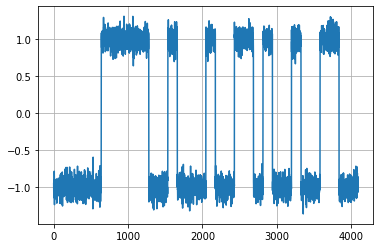

In [15]:
secuencia = np.concatenate([[v]*128 for v in secuencia])
secuencia = secuencia.astype('float')

secuenciap=secuencia.copy()

symbol1 = secuenciap[secuenciap==1]
noise1 = np.random.normal(0, 0.1, size=symbol1.size)
secuenciap[secuenciap==1] = symbol1 + noise1

symbol2 = secuenciap[secuenciap==-1]
noise2 = np.random.normal(0, 0.1, size=symbol2.size)
secuenciap[secuenciap==-1] = symbol2 + noise2

"""
plt.xlim(20,40)
plt.plot(range(tamaño),secuenciap, C='red', label='con ruido')
plt.step(range(tamaño),secuencia,'--', C='C', label='original')
plt.legend()
plt.grid()
"""

plt.plot(secuenciap)
plt.grid()
print(secuenciap.shape)

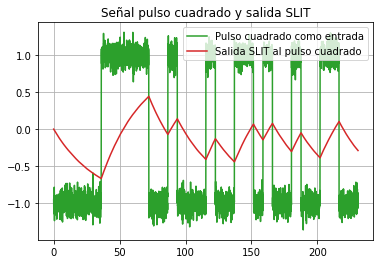

In [18]:
#Pasamos por sistema LTI

input_=secuenciap.copy()
t, h=lti_system.impulse(N=len(secuenciap))

_, output_, _ = lti_system.output(input_, t)
output_ = np.convolve(input_, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.plot(t,input_, C='C2', label='Pulso cuadrado como entrada')
plt.plot(t,output_, C='C3', label='Salida SLIT al pulso cuadrado')
plt.title("Señal pulso cuadrado y salida SLIT")
plt.legend()
plt.grid()

In [21]:
def pltbase(n=1):
  #secuencia = secuencia.astype('float')

  secuenciapp=secuencia.copy()
  symbol1p = secuenciapp[secuenciapp==1]
  noise1p = np.random.normal(0, n, size=symbol1p.size)
  secuenciapp[secuenciapp==1] = symbol1p + noise1p

  symbol2p = secuenciapp[secuenciapp==-1]
  noise2p = np.random.normal(0, n, size=symbol2.size)
  secuenciapp[secuenciapp==-1] = symbol2p + noise2p

  #Pasamos por sistema LTI señal

  input_s=secuencia.copy()
  ts, hs=lti_system.impulse(N=len(secuencia))

  _, output_s, _ = lti_system.output(input_s, ts)
  output_s= np.convolve(input_s, hs)[:ts.shape[0]]*((ts[-1]/ts.shape[0]))
  mensaje_s=output_s

  #Pasamos por sistema LTI señal ruido

  input_=secuenciapp.copy()
  t, h=lti_system.impulse(N=len(secuenciapp))

  _, output_, _ = lti_system.output(input_, t)
  output_ = np.convolve(input_, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

  """
  plt.plot(t,input_, C='C2', label='Pulso cuadrado como entrada')
  plt.plot(t,output_, C='C3', label='Salida SLIT al pulso cuadrado')
  plt.title("Señal pulso cuadrado y salida SLIT")
  plt.legend()
  plt.grid()
  """

  d_ap=[]#señal interpretada vacía
  for j in output_.reshape(output_.shape[0],-1):
    if np.sum((j-(mensaje_s.min()))**2) > np.sum((j-(mensaje_s.max()))**2):#comparación de grado de parecido con cada simbolo para la toma de decisión posterior
      d_ap.append(mensaje_s.max())
    else:
      d_ap.append(mensaje_s.min())
  ######
  #cuantos 1 y -1 detectó 
  pruebap=np.zeros(tamaño*128)
  for i in range (0, tamaño*128):
    pruebap[i]=d_ap[i]


  for i in range (0, len(vector)):
    if (pruebap[i]==secuencia[i]):
     vector[i]=1
    else:
     vector[i]=0

  vectoru = vector[vector==1]
  vectorc = vector[vector==0]

  probe=len(vectorc)/len(vector)

  #######
  ms_origp=output_[::1] 
  plt.figure(figsize=(16,5),dpi=90)
  plt.subplot(211)
  plt.title('Comparacíon del mensaje enviado y el interpretado, Pe = %.1f %%' % (100*probe))
  plt.plot(range(len(ms_origp)),ms_origp,linewidth=5,alpha=0.5,label='Mensaje original con ruido')
  plt.step(range(len(d_ap)),d_ap,'--',color='red',label='Mensaje interpretado')
  plt.step(range(tamaño*128),output_s,linewidth=5,alpha=0.5, color='green', label='Mensaje original')
  plt.legend(loc=1)
  plt.grid()

  ####

  #sns.distplot(output_, bins=100)

  gaussian1=[]
  gaussian2=[]

  for i in range (0,len(output_)):
    if (d_ap[i]==1):
      gaussian1.append(output_[i])    
    else:
      gaussian2.append(output_[i])

  plt.subplot(212)
  sns.distplot(gaussian1, bins=100)
  sns.distplot(gaussian2, bins=100)

  print(len(vector),len(vectoru), len(vectorc))
  return

interact(pltbase,n=(0.1,0.9,0.1))

interactive(children=(FloatSlider(value=0.9, description='n', max=0.9, min=0.1), Output()), _dom_classes=('wid…

<function __main__.pltbase>